# Biodiversity Among National Parks

## Import Modules

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Data Import

In [40]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [46]:
observations.head()

#observations.info()


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [44]:
species.head()
# print(species.info())

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


## Exploratory Analysis by Park

In [24]:
def barplot_with_subplots(dataframe, x_values, y_values, categories, sns_palette, figsize_x, figsize_y, x_label_rotation=0, figure_title = ''):
    import math

    categories_list = dataframe[categories].value_counts().index.tolist()
    number_of_subplots = len(categories_list)  # get the number or rows and columns for subplot

    # set the number of rows for the subplot
    if number_of_subplots <= 4:
        rows = 1
    elif number_of_subplots <= 8:
        rows = 2
    elif number_of_subplots <= 12:
        rows = 3
    else:
        print('Too many categories.')

    columns = math.ceil(number_of_subplots / rows)
    subplot_index = 1
    palette_index = 0

    # create color palette
    palette_list = sns.color_palette(sns_palette, len(categories_list))

    # create subplots by iterating through 'categories_list'
    plt.subplots(rows, columns, figsize=(figsize_x, figsize_y), sharey=True)
    plt.suptitle(figure_title)  # Add the figure title here

    for category in categories_list:
        plot_data = dataframe[dataframe[categories] == category]
        plt.subplot(rows, columns, subplot_index)
        ax = sns.barplot(x=x_values, y=y_values, data=plot_data, color=palette_list[palette_index])
        plt.title(category)

        # if len(plot_data) > 2:
        #     # Calculate the pearsonr value
        #     corr_coeff, _ = pearsonr(plot_data[x_values], plot_data[y_values])
        #     # Annotate the plot with pearsonr value
        #     ax.annotate(f"Pearson r: {corr_coeff:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

        # Rotate the x-axis labels
        plt.xticks(rotation=x_label_rotation)

        subplot_index += 1
        palette_index += 1

    plt.tight_layout()
    plt.show()


### Testing the mehtodology of data collection

In [6]:
# checking the number of species recorded in each park
park_names = observations['park_name'].unique().tolist()
print(park_names)

yosemite_observations = observations[observations['park_name'] == 'Yosemite National Park']
great_smoky_observations = observations[observations['park_name'] == 'Great Smoky Mountains National Park']
bryce_obervations = observations[observations['park_name'] == 'Bryce National Park']
yellowstone_observations = observations[observations['park_name'] == 'Yellowstone National Park']

for name in park_names:
    df = observations[observations['park_name'] == name]
    count = df['observations'].sum()
    print(len(df['scientific_name']))
    print(count)

['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']
5824
431820
5824
863332
5824
576025
5824
1443562


In [7]:
# Testing the length of a merged dataframe on each scientific_name against Yosemite. 

merged_df = pd.merge(yosemite_observations, great_smoky_observations, on='scientific_name', how='inner')
print(merged_df.shape[0])

merged_df = pd.merge(yosemite_observations, bryce_obervations, on='scientific_name', how='inner')
print(merged_df.shape[0])

merged_df = pd.merge(yosemite_observations, yellowstone_observations, on='scientific_name', how='inner')
print(merged_df.shape[0])

6408
6408
6408


> It appears that the survey was done with the same list of species used for all parks. The surveyors then counted the number of each of these species in each park under observations. 

### Analyzing Conservation Status

In [13]:
# drop all NaN values in species['conservation_status']
filtered_species = species.dropna(subset=['conservation_status'])

# create dataframe of species that have conservation notes
conservation_df = filtered_species.merge(observations, on='scientific_name', how='left')
#conservation_df.info()
#print(conservation_df.head(5))

                             park_name           category  count
0                  Bryce National Park          Amphibian      7
1                  Bryce National Park               Bird     87
2                  Bryce National Park               Fish     12
3                  Bryce National Park             Mammal     58
4                  Bryce National Park  Nonvascular Plant      5
5                  Bryce National Park            Reptile      5
6                  Bryce National Park     Vascular Plant     46
7  Great Smoky Mountains National Park          Amphibian      7
8  Great Smoky Mountains National Park               Bird     87
9  Great Smoky Mountains National Park               Fish     12


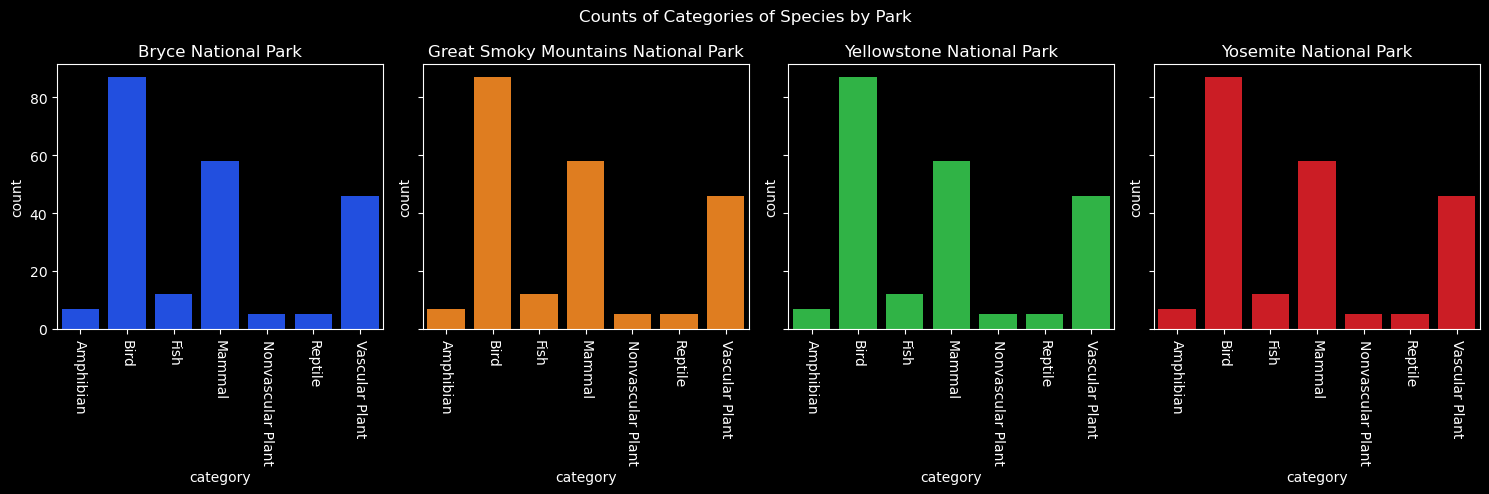

In [26]:
count_df = conservation_df.groupby(['park_name', 'category']).size().reset_index(name='count')
print(count_df.head(10))

barplot_with_subplots(count_df, 'category', 'count', 'park_name', 'bright', 15, 5, 270, figure_title= "Counts of Categories of Species by Park")

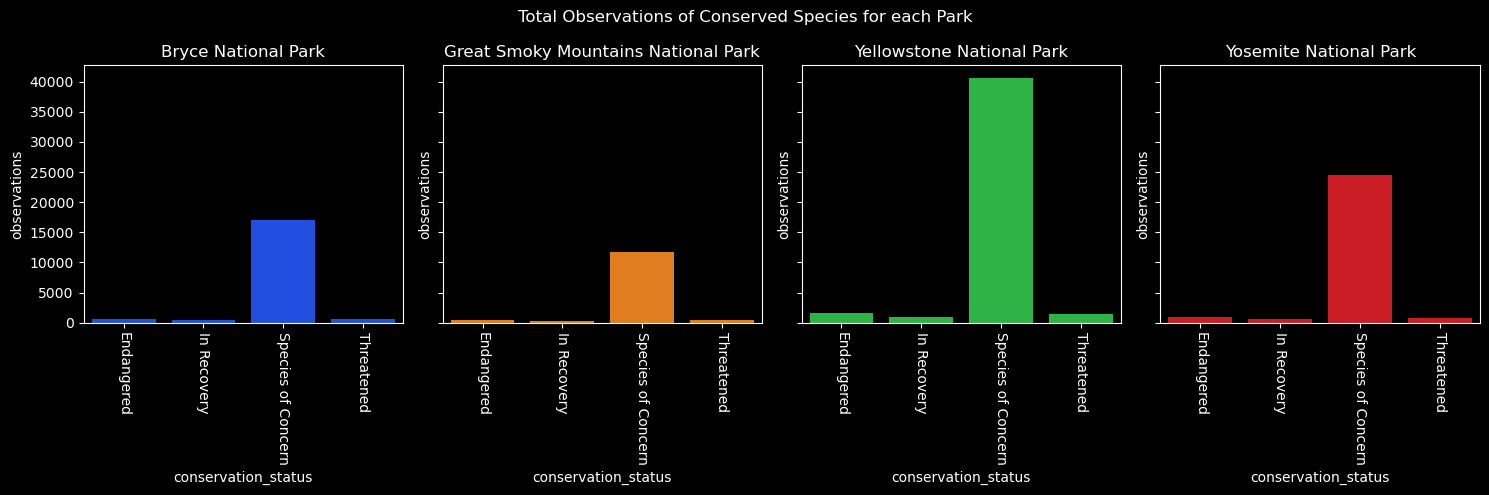

In [27]:
# bar graphs of the counts of individual species for each conservation_status by park

category_count = conservation_df.groupby(['conservation_status', 'park_name']).observations.sum()

category_count_df = category_count.reset_index(name = 'observations')
#print(category_count_df.head(50))

barplot_with_subplots(category_count_df, 'conservation_status', 'observations', 'park_name', 'bright', 15, 5, 270, figure_title= 'Total Observations of Conserved Species for each Park')

             category conservation_status  count
0           Amphibian          Endangered      4
1           Amphibian  Species of Concern     16
2           Amphibian          Threatened      8
3                Bird          Endangered     16
4                Bird         In Recovery     12
5                Bird  Species of Concern    320
6                Fish          Endangered     12
7                Fish  Species of Concern     16
8                Fish          Threatened     20
9              Mammal          Endangered     44
10             Mammal         In Recovery     12
11             Mammal  Species of Concern    168
12             Mammal          Threatened      8
13  Nonvascular Plant  Species of Concern     20
14            Reptile  Species of Concern     20
15     Vascular Plant          Endangered      4
16     Vascular Plant  Species of Concern    172
17     Vascular Plant          Threatened      8


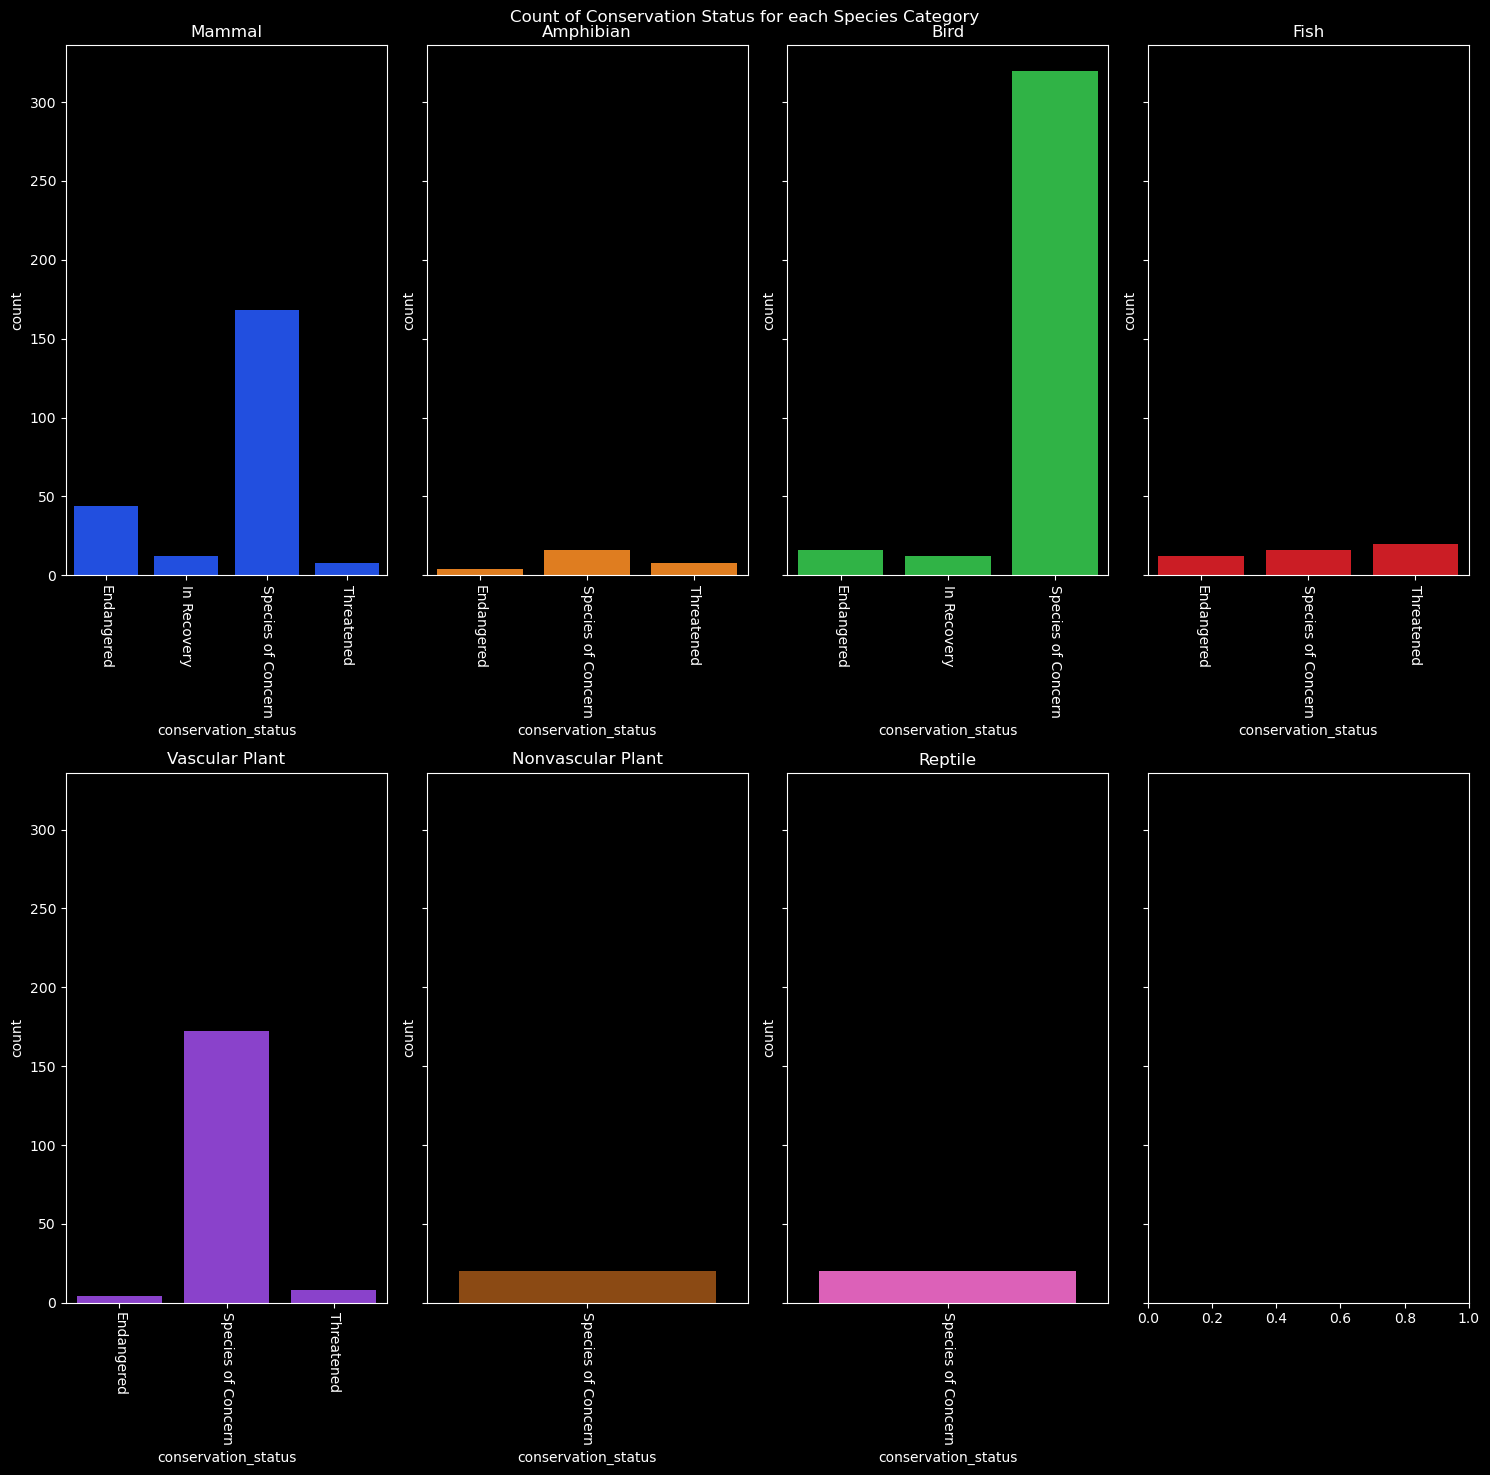

In [28]:
# Bar chart of conservation status separated out by species category
plot_data = conservation_df.groupby(['category', 'conservation_status']).size().reset_index(name='count')
print(plot_data.head(50))

barplot_with_subplots(plot_data, 'conservation_status', 'count', 'category', 'bright', 15, 15, 270, figure_title= 'Count of Conservation Status for each Species Category')

### Get Random Species and See It's distribution among parks

Bazzania denudata


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Yosemite National Park'),
  Text(1, 0, 'Great Smoky Mountains National Park'),
  Text(2, 0, 'Yellowstone National Park'),
  Text(3, 0, 'Bryce National Park')])

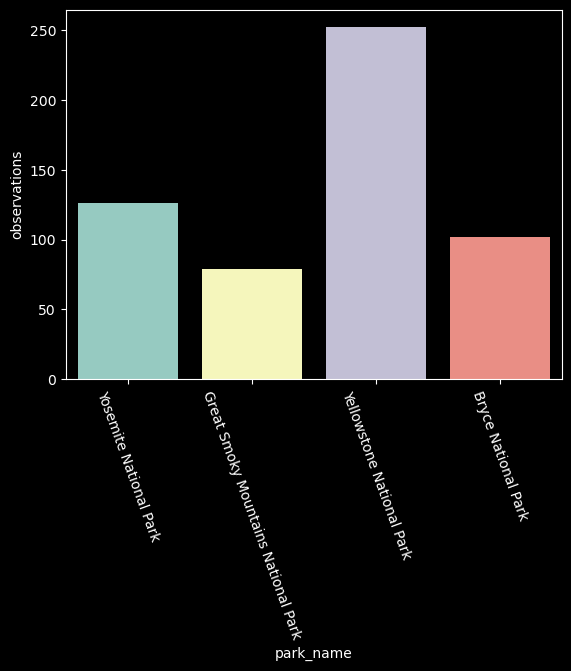

In [75]:
# Generate list of unique species names
species_names_unique = observations['scientific_name'].unique().tolist()


# get a random species
random_index = random.randint(0,len(species_names_unique))
random_species = species_names_unique[random_index]
print(random_species)

plot_data = observations[observations['scientific_name'] == random_species]
ax = sns.barplot(x= 'park_name', y= 'observations', data= plot_data)
plt.xticks(rotation=290)



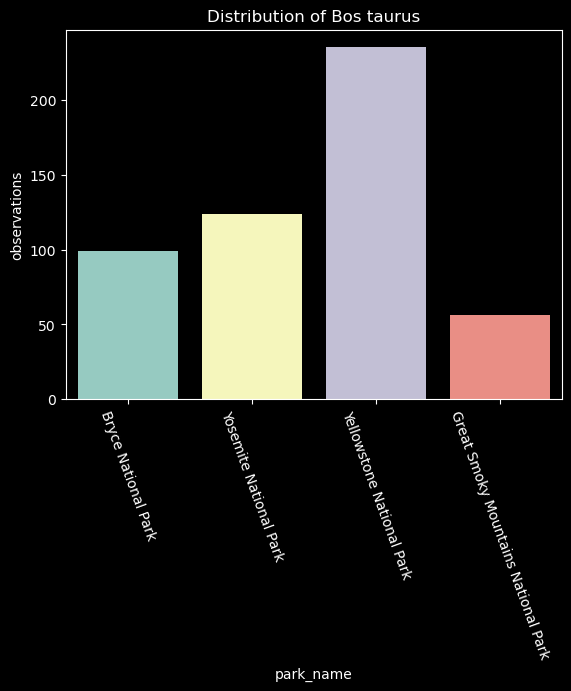

In [78]:
# function to input a scientific name and get it's distribution among parks

def species_park_distribution(scientific_name = ''):
    plot_data = observations[observations['scientific_name'] == scientific_name]
    ax = sns.barplot(x= 'park_name', y= 'observations', data= plot_data)
    plt.xticks(rotation=290)
    plt.title('Distribution of ' + str(scientific_name))

species_park_distribution('Bos taurus')    